In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Useful sklearn imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import fetch_openml

# Logistic regression

## Data loading and exploration

In [2]:
# Data for logistic regression
def real_data_logistic():
    # We will load the Titanic dataset form openml
    try:
        titanic_data = fetch_openml(
            name="titanic",
            version=1,
            as_frame=True
        )
        df_titanic = titanic_data.frame.drop('body', axis=1)
    except Exception as e:
        print(f"Error loading Titanic dataset: {e}.")

    # Features
    X_titanic = df_titanic.drop('survived', axis=1)
    # Target variable
    y_titanic = df_titanic['survived']

    return X_titanic, y_titanic

### Get real data for logistic regression

In [3]:
X, y = real_data_logistic()

### Explore the data, visualizing it, etc.

In [4]:
# What type of data do we have?
print('X data types:')
print(X.dtypes)
print('\n')
print('y data types:')
print(y.dtypes)

X data types:
pclass          int64
name           object
sex          category
age           float64
sibsp           int64
parch           int64
ticket         object
fare          float64
cabin          object
embarked     category
boat           object
home.dest      object
dtype: object


y data types:
category


In [5]:
X.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
# Convert categorical variables to dummies
X = pd.get_dummies(
    X,
    columns=['sex','embarked'],
    drop_first=True)


In [7]:
X.head()

,pclass,name,age,sibsp,parch,ticket,fare,cabin,boat,home.dest,sex_male,embarked_Q,embarked_S
0,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,2,"St Louis, MO",False,False,True
1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,11,"Montreal, PQ / Chesterville, ON",True,False,True
2,1,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",False,False,True
3,1,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",True,False,True
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,NaN,"Montreal, PQ / Chesterville, ON",False,False,True


In [8]:
# Let's encode the categorical variables
def encode_categorical(X):
    # Select the categorical columns
    cat_cols = X.select_dtypes(include=['object']).columns
    print(f'Categorical columns: {cat_cols}')
    
    # Create a label encoder object
    le = LabelEncoder()

    # Apply the label encoder to each column
    for col in cat_cols:
        X[col] = le.fit_transform(X[col])

    return X


# The rest, simply encode
X_encoded = encode_categorical(X)

Categorical columns: Index(['name', 'ticket', 'cabin', 'boat', 'home.dest'], dtype='object')


In [9]:
X_encoded.head()

,pclass,name,age,sibsp,parch,ticket,fare,cabin,boat,home.dest,sex_male,embarked_Q,embarked_S
0,1,21,29.0000,0,0,187,211.3375,43,11,308,False,False,True
1,1,23,0.9167,1,2,49,151.5500,79,2,230,True,False,True
2,1,24,2.0000,1,2,49,151.5500,79,27,230,False,False,True
3,1,25,30.0000,1,2,49,151.5500,79,27,230,True,False,True
4,1,26,25.0000,1,2,49,151.5500,79,27,230,False,False,True


In [10]:
# Drop NaN values
X_features = X_encoded.dropna()
y_target = y.loc[X_features.index]

## Fit a logistic regression model

### Based on a train-test split

In [11]:
# Split the data into training and test sets, using sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_features,
    y_target,
    test_size=0.2,
    random_state=42
)

In [12]:
# Define a Logistic Regression model
model_logistic = LogisticRegression(
    random_state=42,
    max_iter=1000
  )

# MLE fitting
model_logistic.fit(
    X = X_train,
    y = y_train
)

/home/iurteaga/miniconda3/envs/2025_stats_for_ai/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [13]:
# Look at the coefficients
print('Model coefficients:')
print(model_logistic.coef_)
print('Model intercept:')
print(model_logistic.intercept_)
print('Model classes:')
print(model_logistic.classes_)
print('Model number of iterations:')
print(model_logistic.n_iter_)
print('Model score:')
print(model_logistic.score(X_features, y_target))

Model coefficients:
[[ 1.95512590e-01  7.34638186e-05 -3.05482153e-02 -2.68130002e-01
  -1.30616882e-01 -1.04040835e-03  1.63873145e-03 -1.01868660e-02
  -9.16581067e-01 -2.16296595e-03 -2.26716488e+00 -2.39140315e+00
   3.88438485e-02]]
Model intercept:
[26.70312234]
Model classes:
['0' '1']
Model number of iterations:
[1000]
Model score:
0.9626794258373206


In [14]:
# Predict on the training set
y_pred_train = model_logistic.predict(X_train)
# Predict on the test set
y_pred_test = model_logistic.predict(X_test)

# Evaluate the model
print("--- Logistic Regression (Train Set) ---")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("\n--- Logistic Regression (Test Set) ---")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

--- Logistic Regression (Train Set) ---
Accuracy: 0.9641148325358851
Confusion Matrix:
 [[494   4]
 [ 26 312]]

--- Logistic Regression (Test Set) ---
Accuracy: 0.9569377990430622
Confusion Matrix:
 [[119   1]
 [  8  81]]


### Beyond accuracy: ROC curve

ROC AUC: 0.9876404494382023


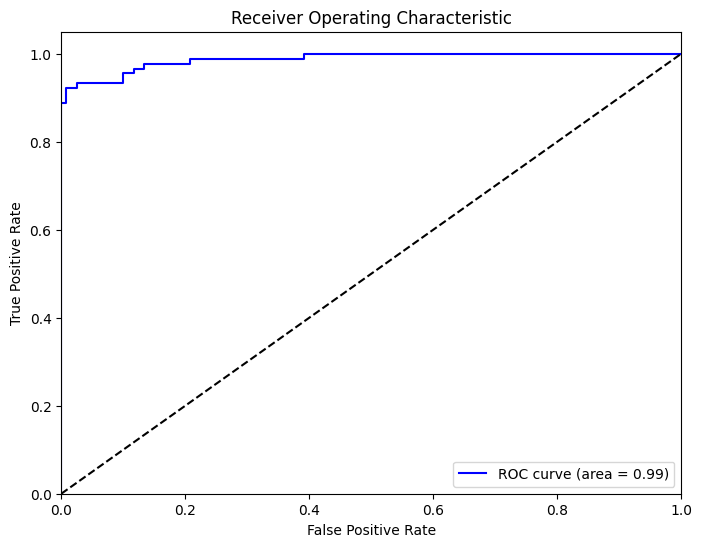

In [15]:
# ROC and AUC, using sklearn
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import RocCurveDisplay

# Predict probabilities
# Predict probabilities for the test set
# Note: The predict_proba method returns the probabilities for each class
# and we want the probability of the positive class (1)
y_prob = model_logistic.predict_proba(X_test)[:, 1]
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(
    y_test,
    y_prob,
    pos_label='1'
)
# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, c='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [16]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , 0.00833333, 0.00833333,
        0.025     , 0.025     , 0.1       , 0.1       , 0.11666667,
        0.11666667, 0.13333333, 0.13333333, 0.20833333, 0.20833333,
        0.39166667, 0.39166667, 1.        ]),
 array([0.        , 0.01123596, 0.88764045, 0.88764045, 0.92134831,
        0.92134831, 0.93258427, 0.93258427, 0.95505618, 0.95505618,
        0.96629213, 0.96629213, 0.97752809, 0.97752809, 0.98876404,
        0.98876404, 1.        , 1.        ]),
 array([           inf, 1.00000000e+00, 7.05691766e-01, 6.21570151e-01,
        4.60196905e-01, 3.43789628e-01, 3.04895610e-01, 1.93383382e-01,
        1.81634737e-01, 1.58898669e-01, 1.54615161e-01, 1.47741306e-01,
        1.41139873e-01, 6.74696783e-02, 6.73934105e-02, 3.56821064e-02,
        3.47385560e-02, 5.04292830e-04]))

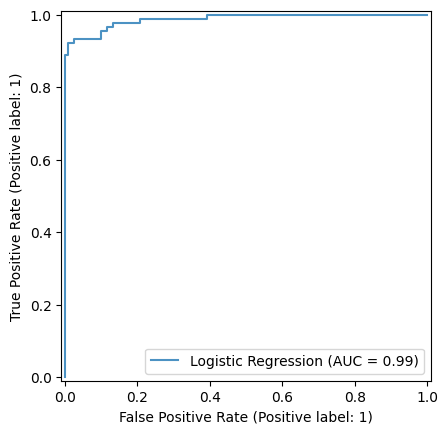

In [17]:
# Plot the ROC curve using sklearn's RocCurveDisplay
RocCurveDisplay.from_estimator(
    model_logistic,
    X_test,
    y_test,
    name='Logistic Regression',
    alpha=0.8
)
plt.show()

ROC AUC (Train Set): 0.9941481903947149


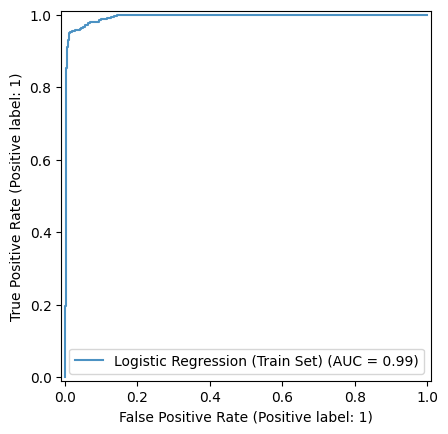

In [18]:
### How does the model perform on the training set?
# Predict probabilities for the training set
y_prob_train = model_logistic.predict_proba(X_train)[:, 1]
# Calculate the ROC curve for the training set
fpr_train, tpr_train, thresholds_train = roc_curve(
    y_train,
    y_prob_train,
    pos_label='1'
)
# Calculate the AUC for the training set
roc_auc_train = roc_auc_score(y_train, y_prob_train)
print("ROC AUC (Train Set):", roc_auc_train)
# Plot the ROC curve using sklearn's RocCurveDisplay for the training set
RocCurveDisplay.from_estimator(
    model_logistic,
    X_train,
    y_train,
    name='Logistic Regression (Train Set)',
    alpha=0.8
)
plt.show()

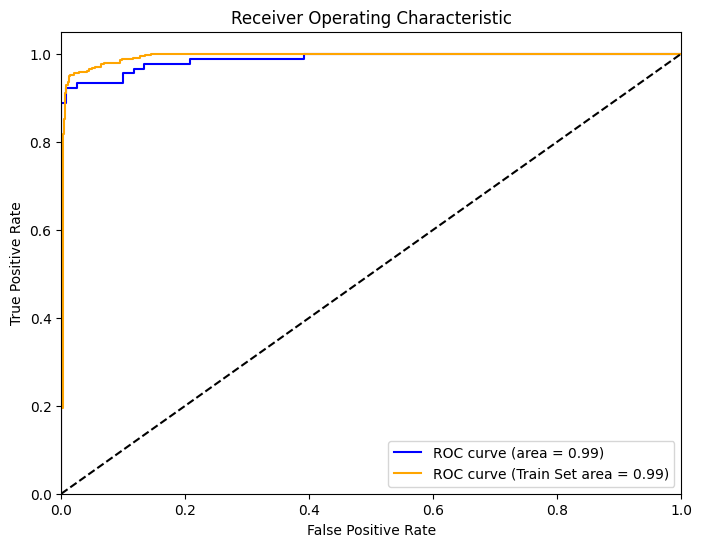

In [19]:
# Plot the ROC curve for both training and test sets
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, c='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot(fpr_train, tpr_train, c='orange', label='ROC curve (Train Set area = {:.2f})'.format(roc_auc_train))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Average Precision (Train Set): 0.9894876151808829
Average Precision (Test Set): 0.9867151569208593


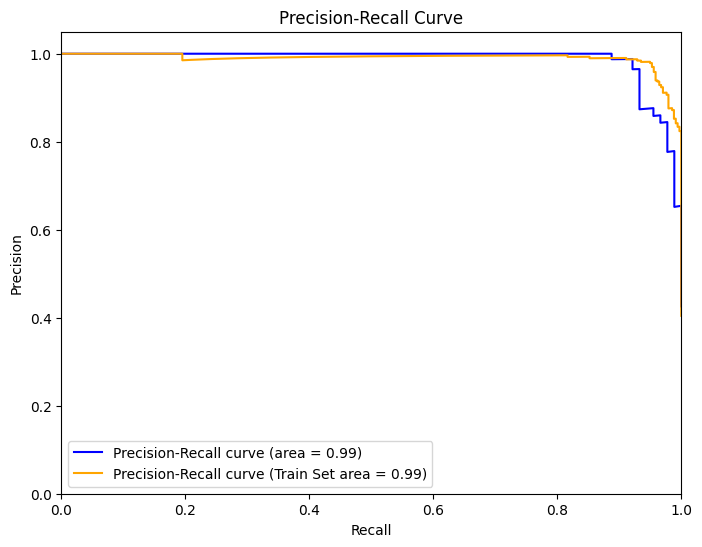

In [20]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay

# Calculate precision and recall
# Predict probabilities for the training set
y_prob_train = model_logistic.predict_proba(X_train)[:, 1]
# Calculate precision and recall for the training set
precision_train, recall_train, thresholds_pr_train = precision_recall_curve(
    y_train,
    y_prob_train,
    pos_label='1'
)
# Calculate the average precision score for the training set
avg_precision_train = average_precision_score(y_train, y_prob_train, pos_label='1')
print("Average Precision (Train Set):", avg_precision_train)

# Predict probabilities for the test set
y_prob = model_logistic.predict_proba(X_test)[:, 1]
# Calculate precision and recall for the test set
precision, recall, thresholds_pr = precision_recall_curve(
    y_test,
    y_prob,
    pos_label='1'
)
# Calculate the average precision score for the test set
avg_precision = average_precision_score(y_test, y_prob, pos_label='1')
print("Average Precision (Test Set):", avg_precision)

# Plot the precision-recall curve, for both training and test sets
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, c='blue', label='Precision-Recall curve (area = {:.2f})'.format(avg_precision))
plt.plot(recall_train, precision_train, c='orange', label='Precision-Recall curve (Train Set area = {:.2f})'.format(avg_precision_train))
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


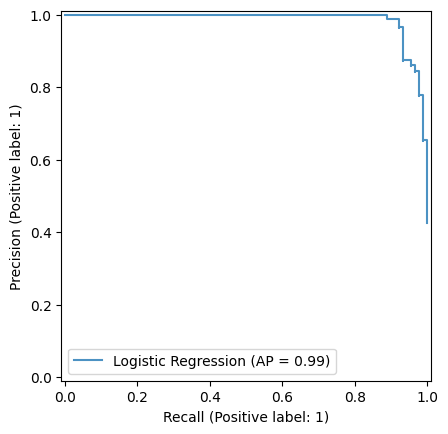

In [21]:
# Plot the precision-recall curve using sklearn's PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(
    model_logistic,
    X_test,
    y_test,
    name='Logistic Regression',
    alpha=0.8
)
plt.show()

### How does all of the above change with

- Number of features?

- Number of samples?

- Different train-test splits?